# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Define URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Save config information
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

In [19]:
# Set initial count
count_one = 0
set_one = 1

In [21]:
# set lists for dataframe
city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

In [23]:
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not Found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
        

Processing Record 1 of Set 1 | lamballe
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | lambarene
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | port alfred
City not Found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bambous virieux
City not Found. Skipping...
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | vila velha
City not Found. Skipping...
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | chumikan
Processing Record 15 of Set 1 | punta arenas
City not Found. Skipping...
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | porto seguro
Processing Record 19 of Set 1 | hunenberg
Processing Record 20 of Set 1 | ajdabiya
Processing Record 21 of Set 1 | adrar
Processing Record 22 o

Processing Record 36 of Set 4 | ola
Processing Record 37 of Set 4 | talnakh
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | kyabram
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | torrox
City not Found. Skipping...
Processing Record 42 of Set 4 | dukat
Processing Record 43 of Set 4 | vao
City not Found. Skipping...
City not Found. Skipping...
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | egvekinot
Processing Record 46 of Set 4 | karratha
Processing Record 47 of Set 4 | colares
Processing Record 48 of Set 4 | isilkul
Processing Record 49 of Set 4 | guatire
City not Found. Skipping...
Processing Record 1 of Set 5 | dalvik
City not Found. Skipping...
Processing Record 2 of Set 5 | posse
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | san policarpo
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | descalvado
Processing Record 7 of Set 5 | lao cai
Processing R

Processing Record 21 of Set 8 | ust-nera
Processing Record 22 of Set 8 | dunedin
Processing Record 23 of Set 8 | santa cruz cabralia
City not Found. Skipping...
Processing Record 24 of Set 8 | qui nhon
City not Found. Skipping...
Processing Record 25 of Set 8 | brae
Processing Record 26 of Set 8 | tacoaleche
Processing Record 27 of Set 8 | hambantota
Processing Record 28 of Set 8 | lata
Processing Record 29 of Set 8 | marrakesh
City not Found. Skipping...
City not Found. Skipping...
Processing Record 30 of Set 8 | pandaria
Processing Record 31 of Set 8 | kulebaki
Processing Record 32 of Set 8 | griffith
City not Found. Skipping...
Processing Record 33 of Set 8 | sekoma
Processing Record 34 of Set 8 | shakiso
Processing Record 35 of Set 8 | rundu
Processing Record 36 of Set 8 | qasigiannguit
Processing Record 37 of Set 8 | belaya gora
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | vestmannaeyjar
Processing Record 40 of Set 8 | carballo
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lamballe,90,FR,1570133899,100,48.47,-2.52,59.00,10.29
1,vaini,100,IN,1570133899,95,15.34,74.49,75.04,1.48
2,barrow,100,AR,1570133899,51,-38.31,-60.23,51.98,10.42
3,lambarene,100,GA,1570133900,95,-0.70,10.22,73.10,3.69
4,ponta do sol,100,BR,1570133900,65,-0.53,-65.05,88.52,1.61


In [31]:
# output data to csv
weather_dataframe.to_csv("cities.csv")

In [29]:
weather_dataframe.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

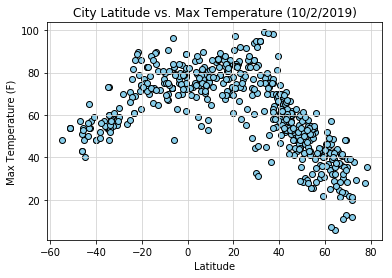

In [33]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

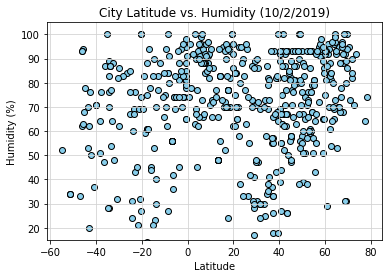

In [34]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid(b=True, which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

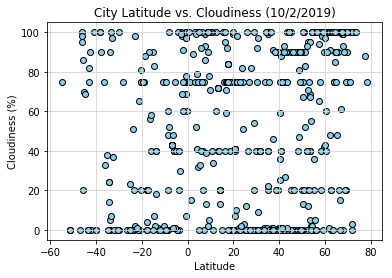

In [35]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

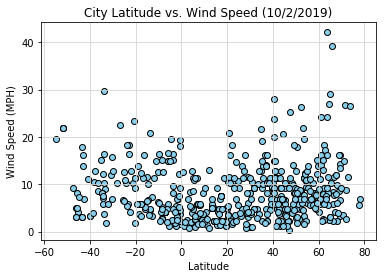

In [36]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (10/2/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(b=True, which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

# Analysis
1) Latitude has a normal distribution in relation temperature with few outliers if any.  
2) As of todays date, humidity is at a higher concentration for those latitudes that are north of the equator.
3) Wind speeds remain constant across the majority of latitudes according to our datasets.